In [1]:
from tensorflow.keras import models,layers

%matplotlib inline 
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from tensorflow.keras.utils import to_categorical

x_train = train_images.astype("float32") / 255.0
x_test = test_images.astype("float32") / 255.0

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [4]:
model = models.Sequential()
model.add(layers.Reshape((28, 28, 1), input_shape=(28,28)))
model.add(layers.Conv2D(
    32, 
    (3,3), 
    activation="relu", 
    input_shape=(28,28,1)
))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation="relu")) ## 3x3 "rolling" window creating a fully connected nn
model.add(layers.MaxPooling2D((2,2))) ## 2x2 "rolling" window getting the max
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

W0723 14:48:54.035257 4551124416 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [5]:
history = model.fit(x_train, y_train, epochs=8, batch_size=512, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 14s 262us/sample - loss: 0.5592 - acc: 0.8273 - val_loss: 0.1505 - val_acc: 0.9535
Epoch 2/10
54000/54000 [==============================] - 14s 255us/sample - loss: 0.1387 - acc: 0.9568 - val_loss: 0.0936 - val_acc: 0.9697
Epoch 3/10
54000/54000 [==============================] - 14s 257us/sample - loss: 0.0840 - acc: 0.9731 - val_loss: 0.0770 - val_acc: 0.9767
Epoch 4/10
54000/54000 [==============================] - 13s 249us/sample - loss: 0.0594 - acc: 0.9817 - val_loss: 0.0496 - val_acc: 0.9862
Epoch 5/10
54000/54000 [==============================] - 13s 246us/sample - loss: 0.0479 - acc: 0.9849 - val_loss: 0.0390 - val_acc: 0.9885
Epoch 6/10
54000/54000 [==============================] - 14s 261us/sample - loss: 0.0381 - acc: 0.9879 - val_loss: 0.0478 - val_acc: 0.9862
Epoch 7/10
54000/54000 [==============================] - 15s 271us/sample - loss: 0.0311 - acc: 0.9899 -

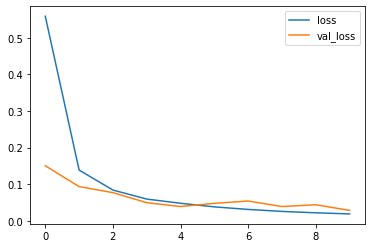

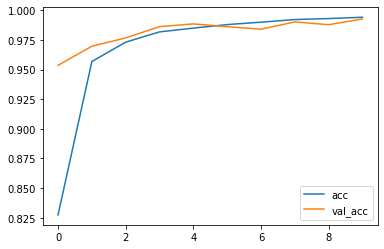

In [6]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.plot(history.history["val_acc"], label="val_acc")
plt.legend()
plt.show()
plt.close()

In [7]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.0270 - acc: 0.9916


[0.027003923591448983, 0.9916]

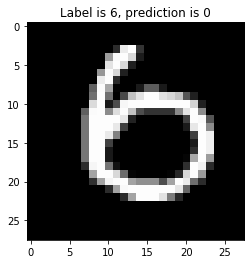

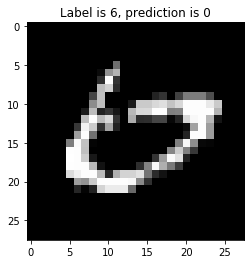

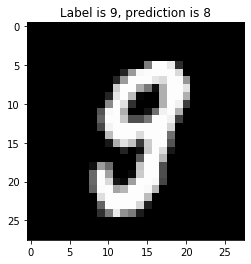

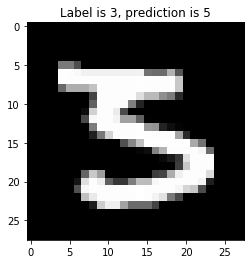

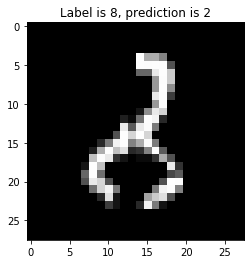

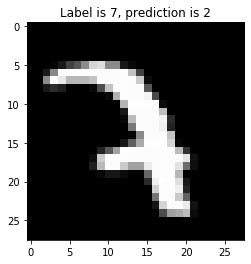

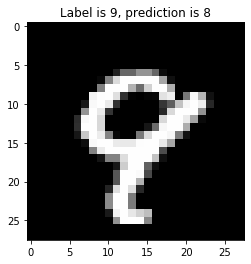

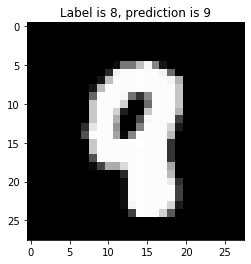

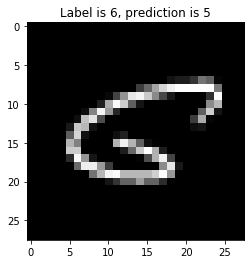

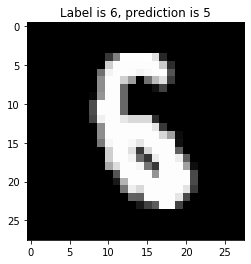

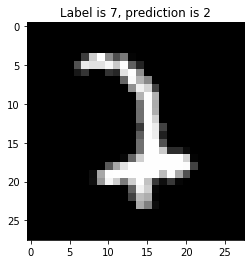

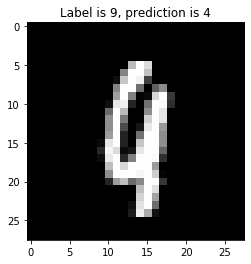

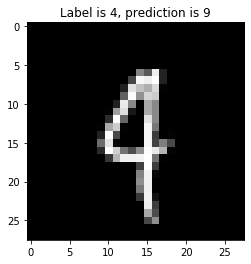

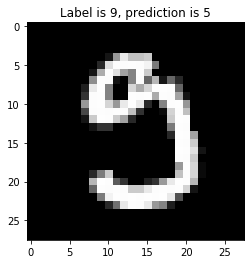

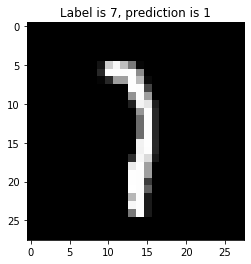

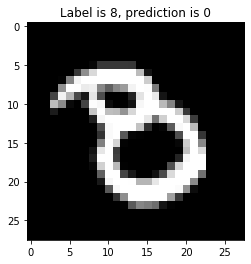

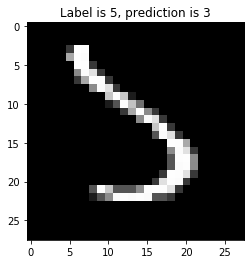

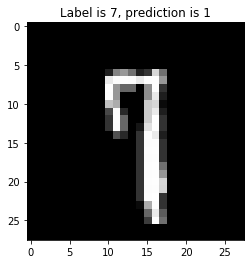

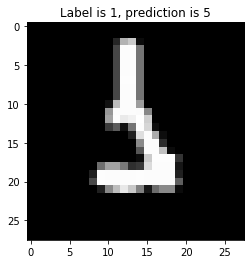

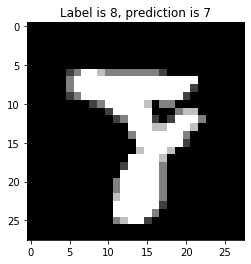

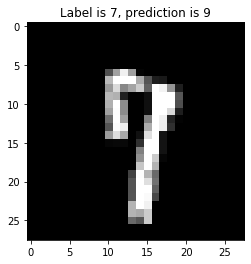

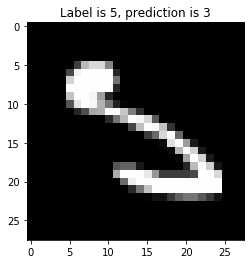

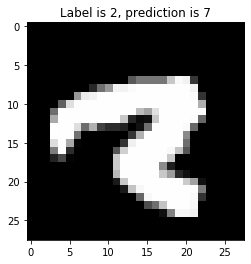

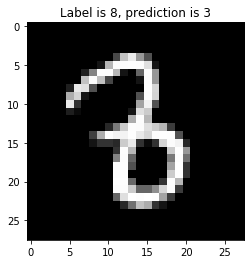

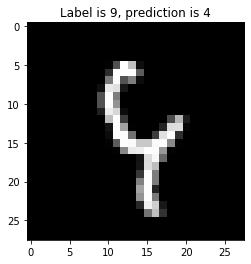

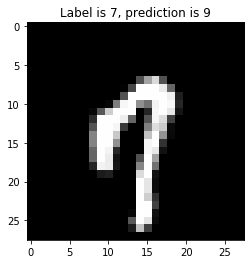

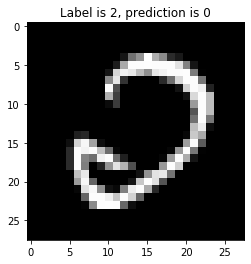

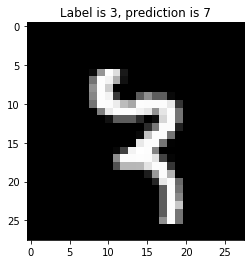

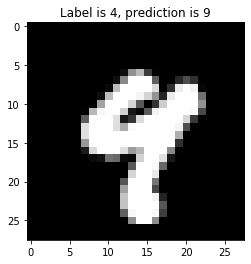

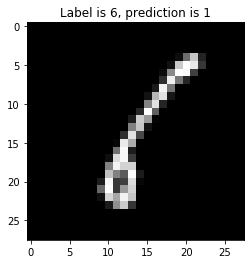

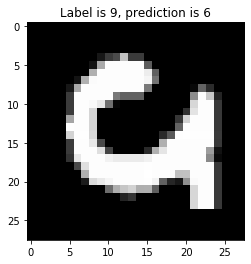

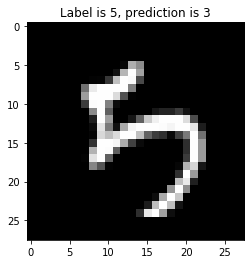

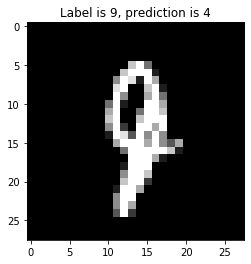

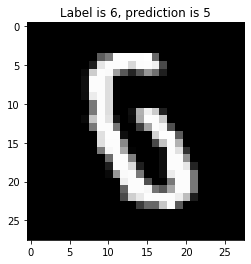

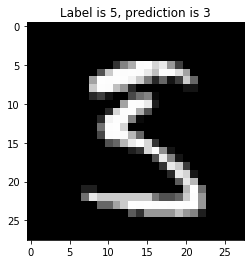

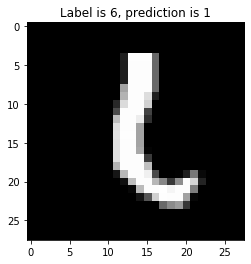

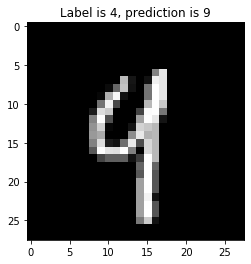

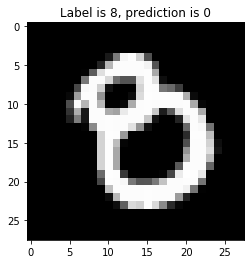

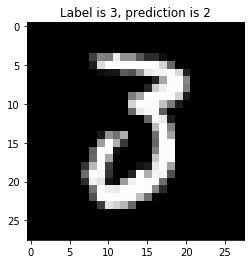

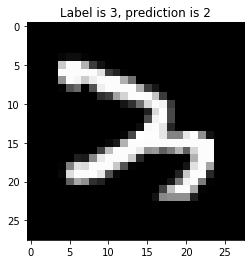

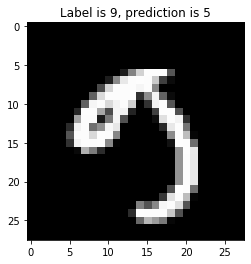

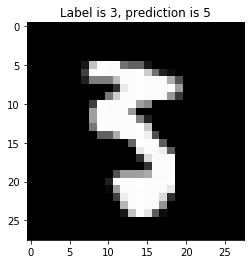

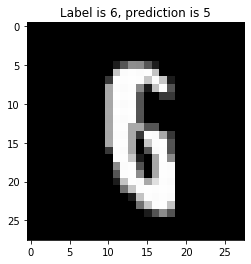

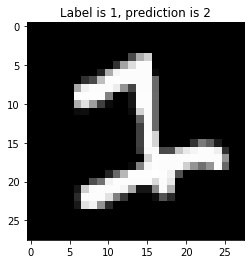

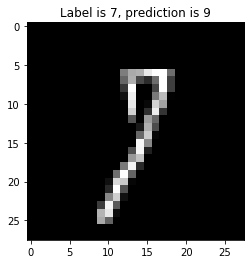

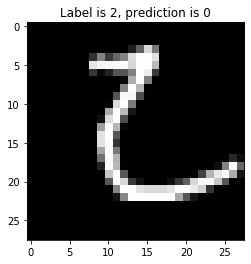

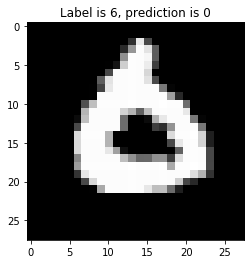

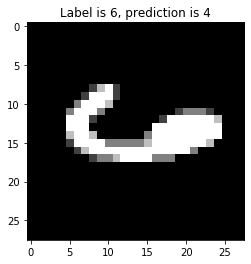

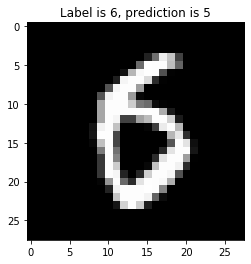

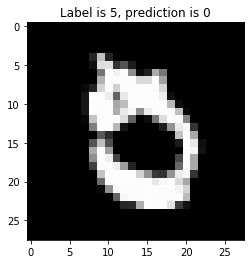

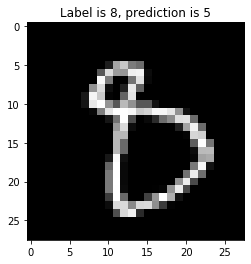

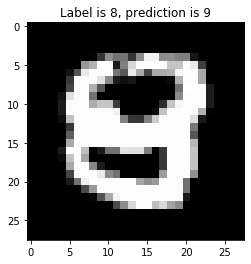

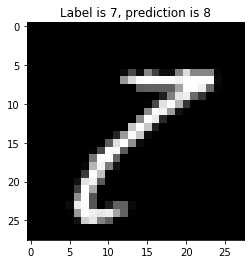

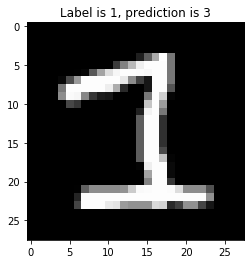

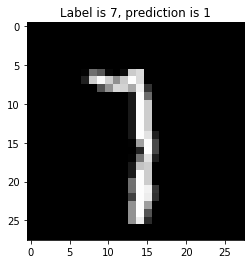

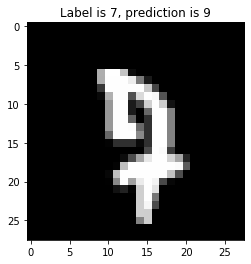

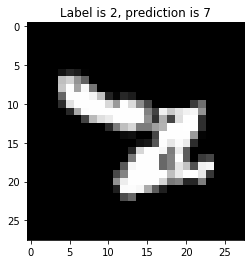

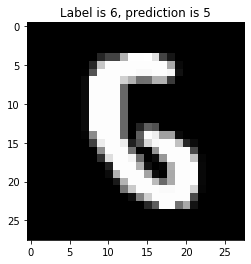

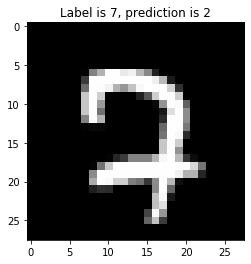

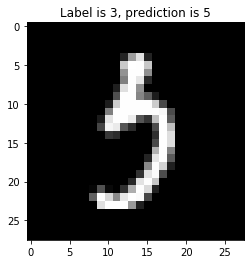

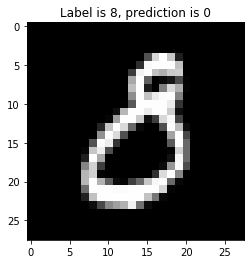

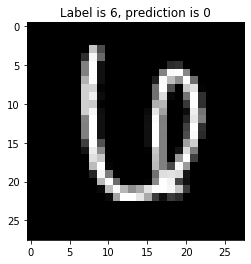

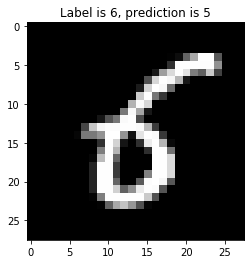

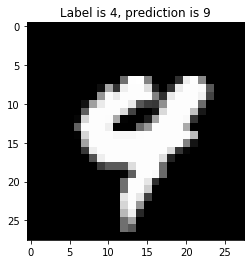

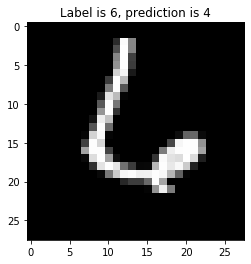

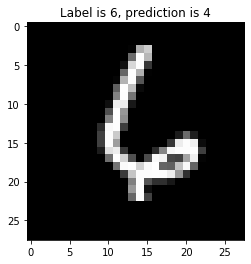

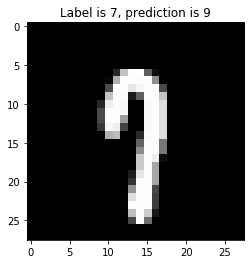

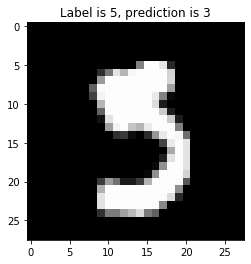

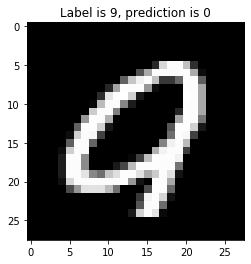

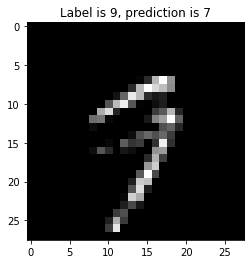

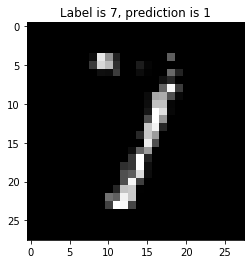

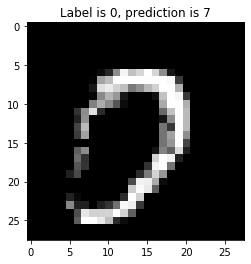

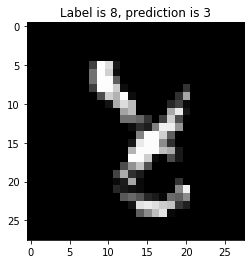

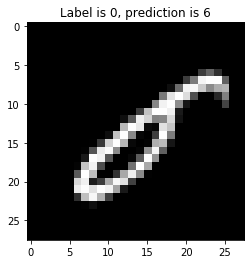

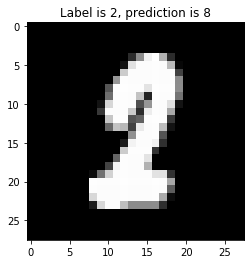

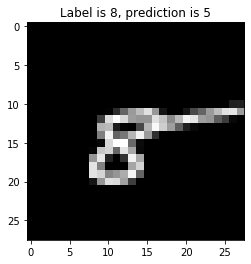

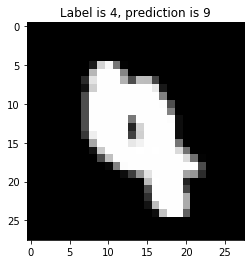

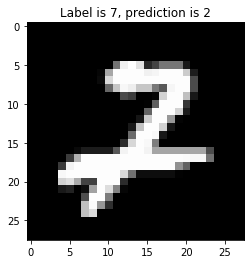

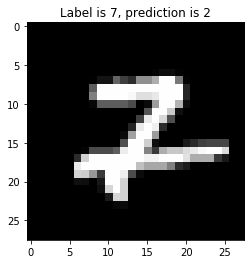

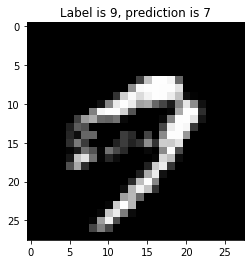

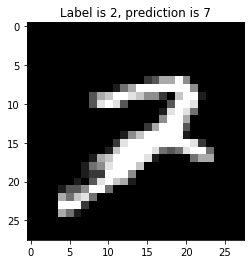

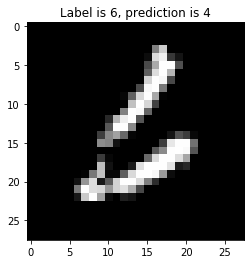

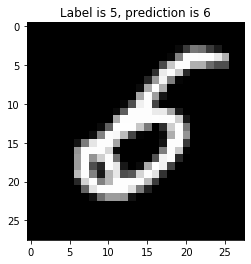

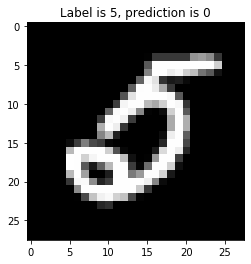

In [48]:
import numpy

prediction = model.predict(x_test)

def show_image(index):
    plt.imshow(test_images[index], cmap="gray")
    plt.title("Label is " + str(test_labels[index]) + ", prediction is " + str(prediction_of(index)))    
    plt.show()
    plt.close()

def prediction_of(index):
    arr = prediction[index]
#     plt.plot(arr)
#     plt.show()
#     plt.close()
    return numpy.where(arr == numpy.amax(arr))[0][0]

for i in range (0, len(test_labels)):
    if (prediction_of(i) != test_labels[i]):
        show_image(i)
    
# prediction = model.predict(x_test[0:1])
#plt.plot(prediction[0]+0.1)
#print(prediction_of(0))

# plt.plot(y_test[0])